In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt
import pickle

In [137]:
df = pd.read_csv('Data/LuxuryAPI.csv')
df[['Date_Pickup','Date_Dropoff']] = df[['Date_Pickup','Date_Dropoff']].apply(pd.to_datetime)
df.head()

,Unnamed: 0,Vehicle_id,Vehicle_Name,Category,Transmission,Base_Price,Price,Date_Pickup,Date_Dropoff
0,227,644881573,Cadillac XTS,Luxury,Automatic,150.09,155.52,2022-11-20,2022-11-21
1,223,636479888,Cadillac XTS,Luxury,Automatic,143.49,148.68,2022-11-20,2022-11-21
2,194,646119413,Cadillac XTS,Luxury,Automatic,137.69,142.67,2022-11-20,2022-11-21
3,208,644901168,Cadillac XTS,Luxury,Automatic,132.64,137.43,2022-11-20,2022-11-21
4,230,636492688,Cadillac XTS,Luxury,Automatic,126.12,130.68,2022-11-20,2022-11-21


In [138]:
start_date = df['Date_Pickup'].iloc[0].strftime('%Y-%m-%d')
end_date = df['Date_Pickup'].iloc[-1].strftime('%Y-%m-%d')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
count = [((df['Date_Pickup'] <= d) & (d <= df['Date_Dropoff'])).sum() for d in date_range]

In [139]:
df.Transmission.unique()

array(['Automatic'], dtype=object)

In [140]:
data = {'Date': date_range, 'Count':count}
df_model = pd.DataFrame(data=data)
df_model['Date'] = df_model['Date'].apply(lambda x: x.toordinal())
df_model.head()

,Date,Count
0,738479,13
1,738480,37
2,738481,39
3,738482,17
4,738483,4


In [141]:
model = LinearRegression()
model.fit(df_model['Date'].values.reshape(-1,1), df_model['Count'])

LinearRegression()

In [134]:
end_date

'2023-03-02'

In [153]:
d = dt.strptime('2023-03-03', '%Y-%m-%d').date()
d = d.toordinal()
d = np.reshape(d, (-1,1))
preds = model.predict(d)
preds

array([55.11707596])

In [157]:
pickle.dump(model, open('count_model.pkl', 'wb'))

Text(0, 0.5, 'Price ($)')

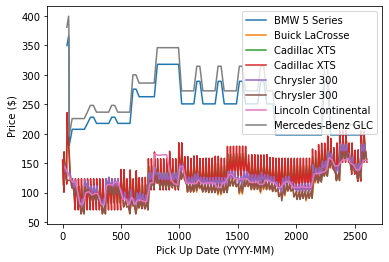

In [17]:
df.groupby('Vehicle_Name')['Price'].plot(legend=True)
plt.xlabel('Pick Up Date (YYYY-MM)')
plt.ylabel('Price ($)')
# plt.gca().xaxis.set_major_locator(mdate.MonthLocator())

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

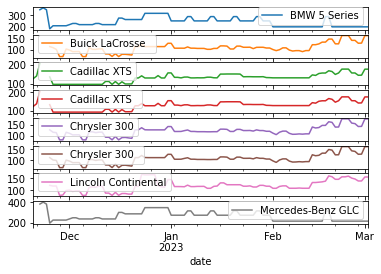

In [18]:
pd.pivot_table(df.reset_index(),
               index='date', columns='Vehicle_Name', values='Price'
              ).plot(subplots=True)